In [1]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd

In [2]:
ds = datasets.fetch_california_housing()

In [3]:
df = pd.DataFrame(ds["data"], columns=ds["feature_names"])

In [4]:
for i in df:
    df[i] = df[i].round(0).astype(int)

In [5]:
df["Latitude"].unique()

array([38, 37, 39, 40, 42, 36, 41, 33, 35, 34])

In [6]:
df.to_csv("cal_housing.csv", index=False)

In [7]:
#döntési fához:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier      
from sklearn.model_selection import train_test_split 
from sklearn import metrics                         
from sklearn.preprocessing import scale
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

#megjelenítéshez:
from sklearn.tree import export_graphviz
from six import StringIO  

from IPython.display import Image  

import pydotplus

import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("train.csv")

In [9]:
slice_at = int(1.0*len(data)) ##

#Minta sorainak összekeverése:
#inflated_labeled_data = inflated_labeled_data.sample(frac=1)

#Felosztása:
X_train = data.drop(columns=["decision"])[0:slice_at]
y_train = data["decision"][0:slice_at]
X_test = data.drop(columns=["decision"])[slice_at:]
y_test = data["decision"][slice_at:]

In [10]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf1 = clf1.fit(X_train, y_train)
#y_pred1 = clf1.predict(X_test)

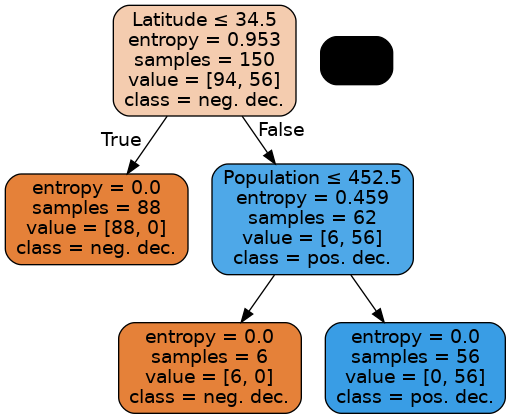

In [11]:
# A döntési fa ábrázolása
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[:-1], class_names=['neg. dec.','pos. dec.'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())